# EDA

#### Exploratory Data Analysis

# Steps

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [5]:
dt=pd.read_csv(r"C:\Users\Shubham\Desktop\Data Science\Data Science Class\Practice Datasets-20230508T093234Z-001\Practice Datasets\Bengaluru_House_Data.csv")

In [6]:
dt.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Shape

In [6]:
dt.shape

(13320, 9)

# Columns

In [9]:
dt.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# Basic Information

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# Statistical summary

In [19]:
dt.describe().style.background_gradient(cmap='Reds',low=0.5,high=1.0,axis=1)

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# Check for the null values

In [20]:
dt.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

- Location, size, society, bat, balcony columns have the null values

# Check for the duplicate values

In [22]:
dt.duplicated().sum()

529

In [24]:
dt[dt.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0


- We have 529 rows as duplicate rows.

# Dropping the duplicates

In [26]:
dt.drop_duplicates(inplace=True)

In [27]:
dt.duplicated().sum()

0

- We have successfully removed the duplicates.

# Treating the null values

- 1- We can drop the null values
- 2- We can impute the null values (filling the null values with some other values)
- Before filling the null values we have to check whether a column is discrete or cataegorical

In [28]:
dt.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [29]:
dt.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

# Loaction

In [33]:
dt.location.dtype

dtype('O')

In [45]:
dt.location.fillna(dt.location.mode()[0],inplace=True)

In [46]:
dt.location.isna().sum()

0

In [43]:
dt.location.mode()[0]

'Whitefield'

# Size

In [50]:
dt['size'].dtype

dtype('O')

In [51]:
# Mode

In [60]:
x=dt['size'].mode()
print(x,type(x))
print(x[0])

0    2 BHK
Name: size, dtype: object <class 'pandas.core.series.Series'>
2 BHK


In [54]:
dt['size'].fillna(dt['size'].mode()[0],inplace=True)

In [55]:
dt.isna().sum()

area_type          0
availability       0
location           0
size               0
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [64]:
dt.size

115119

# Society

- If any column has more than 30% values as null values we drop that column.

In [69]:
dt.society.isna().sum()*100/len(dt)

41.654288171370496

In [72]:
dt.drop('society',axis=1,inplace=True)

In [73]:
dt.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [74]:
dt.isna().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

# bath

In [75]:
dt.bath.dtype

dtype('float64')

In [76]:
dt.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [78]:
dt.bath.fillna(dt.bath.mode()[0],inplace=True)

In [79]:
dt.isna().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony         605
price             0
dtype: int64

# balcony

In [81]:
dt.balcony.dtype

dtype('float64')

In [82]:
dt.balcony.fillna(dt.balcony.mode()[0],inplace=True)

In [83]:
dt.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

# Outliers' Detection

# Price

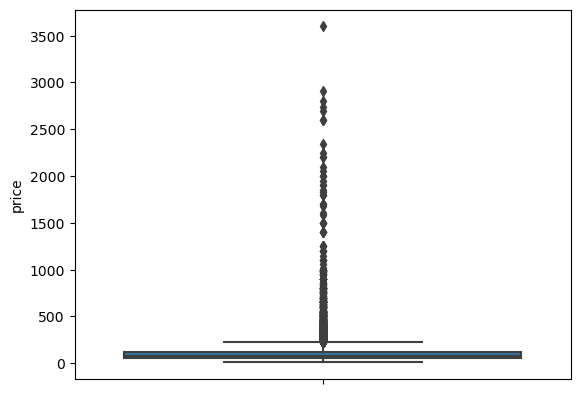

In [7]:
sns.boxplot(y='price',data=dt)

plt.show()

In [8]:
dt.price.describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

# Total sqft

In [9]:
dt.total_sqft.describe()

count     13320
unique     2117
top        1200
freq        843
Name: total_sqft, dtype: object

In [10]:
dt.total_sqft.dtype

dtype('O')

In [11]:
dt.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
ind=dt[dt.total_sqft.str.contains('-')].index

In [13]:
ind

Int64Index([   30,    56,    81,   122,   137,   165,   188,   224,   549,
              579,
            ...
            12544, 12791, 12861, 12955, 12975, 12990, 13059, 13240, 13265,
            13299],
           dtype='int64', length=201)

In [15]:
s=dt[dt.total_sqft.str.contains('-')]['total_sqft'].str.split('-')

In [16]:
lst=[]
for i in s:
    lst.append((float(i[0])+float(i[1]))/2)

In [17]:
print(lst)

[2475.0, 3210.0, 3203.5, 5611.5, 1073.5, 1242.5, 1277.5, 1630.0, 1317.5, 1800.0, 1132.5, 5520.0, 4046.0, 5600.0, 1177.5, 4624.5, 1122.5, 582.5, 1142.5, 4348.5, 657.5, 649.5, 1450.0, 1000.0, 971.5, 1662.0, 687.325, 615.0, 3430.0, 2038.5, 3715.0, 665.0, 4624.5, 776.5, 2817.5, 3817.0, 3461.0, 1277.5, 825.0, 1128.76, 3715.0, 1104.0, 790.5, 3035.0, 3181.0, 3539.5, 2856.0, 700.0, 1559.0, 1352.5, 1800.0, 1950.0, 1185.5, 1005.0, 1707.0, 1476.0, 3181.0, 1192.5, 2912.5, 630.5, 1530.0, 717.0, 1664.0, 3185.0, 4303.5, 1343.5, 3416.5, 1312.5, 1137.5, 458.0, 2345.0, 709.0, 605.0, 2094.0, 2987.5, 2072.5, 1089.0, 1625.0, 2661.0, 680.0, 412.5, 3752.5, 805.5, 709.0, 1462.5, 1891.0, 1617.5, 1302.5, 975.0, 2585.5, 630.5, 2648.0, 614.5, 4334.0, 2336.5, 1302.5, 3317.5, 1405.0, 1532.5, 3550.0, 2856.0, 2856.0, 1583.0, 1115.0, 1162.5, 1580.0, 1272.5, 925.0, 2856.0, 698.5, 1730.0, 1431.5, 4062.5, 1029.5, 2195.0, 1495.0, 778.0, 1155.0, 3496.5, 1700.0, 1522.5, 784.0, 3385.5, 777.0, 2464.5, 640.0, 1773.5, 3854.5, 3

In [18]:
ind

Int64Index([   30,    56,    81,   122,   137,   165,   188,   224,   549,
              579,
            ...
            12544, 12791, 12861, 12955, 12975, 12990, 13059, 13240, 13265,
            13299],
           dtype='int64', length=201)

In [19]:
dt.loc[ind,'total_sqft']=lst

In [20]:
dt.loc[ind]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2475.0,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3210.0,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,3203.5,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,5611.5,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1073.5,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,2038.5,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1335.0,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1075.0,NaN,NaN,52.570
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1258.5,2.0,0.0,59.135


In [21]:
dt.total_sqft.str.contains('-').sum()

0

In [22]:
dt.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [23]:
dt.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [24]:
dt.total_sqft.replace('[A-Za-z. ]','',regex=True,inplace=True)

In [25]:
dt.total_sqft=dt.total_sqft.astype(float)

In [26]:
dt.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

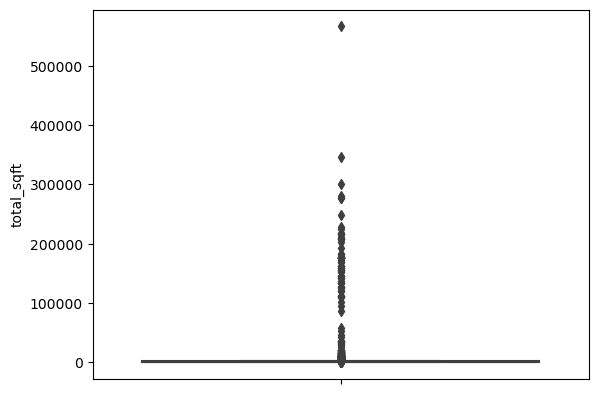

In [27]:
sns.boxplot(y='total_sqft',data=dt)

plt.show()

In [104]:
lst=['150','250','350','450','50 sq. meter','50 meter']
x=list('abcdef')

In [106]:
data=pd.DataFrame({'Name':x,'Area':lst})

In [107]:
data

,Name,Area
0,a,150
1,b,250
2,c,350
3,d,450
4,e,50 sq. meter
5,f,50 meter


In [108]:
data.dtypes

Name    object
Area    object
dtype: object

In [111]:
data.Area.replace('[A-Za-z .]','',regex=True,inplace=True)

In [112]:
data

,Name,Area
0,a,150
1,b,250
2,c,350
3,d,450
4,e,50
5,f,50


In [113]:
data.dtypes

Name    object
Area    object
dtype: object

In [114]:
data.Area.astype(int)

0    150
1    250
2    350
3    450
4     50
5     50
Name: Area, dtype: int32

In [115]:
city=['New York', 'new Delhi', 'Mumbai', 'Beijing', 'Hanoi']
country=['USA','India','India','China','Vietnam']

In [116]:
ct=pd.DataFrame({'City':city,'Country':country})

In [117]:
ct

,City,Country
0,New York,USA
1,new Delhi,India
2,Mumbai,India
3,Beijing,China
4,Hanoi,Vietnam


In [118]:
ct.City.replace('New York','New_York')

0     New_York
1    new Delhi
2       Mumbai
3      Beijing
4        Hanoi
Name: City, dtype: object

In [121]:
ct.City.replace('[Nn]ew ','New_',regex=True)

0     New_York
1    New_Delhi
2       Mumbai
3      Beijing
4        Hanoi
Name: City, dtype: object

In [122]:
import re

In [133]:
text='New York neW Delhi Mumbai Chennai NEw Orleans'

pat='[Nn][eE][wW] '

for i in re.finditer(pat,text):
    print(i)

<re.Match object; span=(0, 4), match='New '>
<re.Match object; span=(9, 13), match='neW '>
<re.Match object; span=(34, 38), match='NEw '>


In [135]:
text='New York neW Delhi Mumbai Chennai NEw Orleans'

pat='[Nn][eE][wW] '

re.sub(pat,'New_',text)

'New_York New_Delhi Mumbai Chennai New_Orleans'

In [151]:
dt.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


# Outliers' Removal

# IQR method

In [148]:
def outlier(data):
    
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)

    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    
    return data.clip(upper_bound,lower_bound)

In [156]:
print(upper_bound)
print(lower_bound)
# print(q1,q3)

2600.0
200.0


In [145]:
dt.total_sqft.describe()

count     12751.000000
mean       2436.581412
std       13206.996703
min           1.000000
25%        1100.000000
50%        1285.000000
75%        1700.000000
max      566584.000000
Name: total_sqft, dtype: float64

In [152]:
dt['Total']=outlier(dt.total_sqft)

In [153]:
dt.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0


In [155]:
dt[['total_sqft','Total']].describe()

,total_sqft,Total
count,12751.000000,12751.000000
mean,2436.581412,1445.561218
std,13206.996703,551.105820
min,1.000000,200.000000
25%,1100.000000,1100.000000
50%,1285.000000,1285.000000
75%,1700.000000,1700.000000
max,566584.000000,2600.000000


<AxesSubplot:ylabel='Total'>

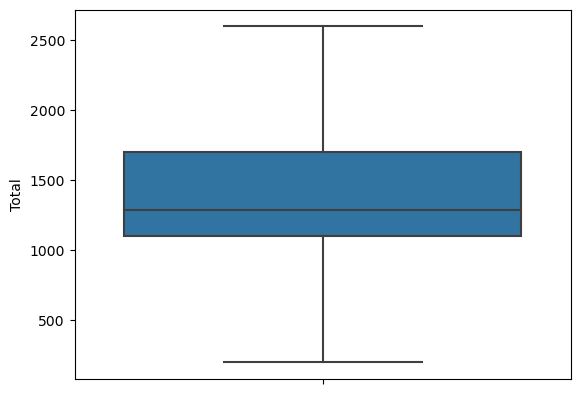

In [157]:
sns.boxplot(y='Total',data=dt)

In [161]:
dt['New_Price']=outlier(dt.price)

In [162]:
dt.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total,New_Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0,51.00


In [163]:
dt[['price','New_Price']].describe()

,price,New_Price
count,12751.000000,12751.000000
mean,114.492961,94.929162
std,151.676492,61.225221
min,8.000000,8.000000
25%,50.000000,50.000000
50%,73.000000,73.000000
75%,122.000000,122.000000
max,3600.000000,230.000000


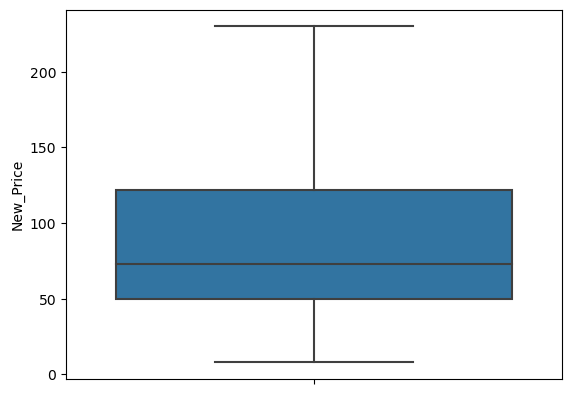

In [165]:
sns.boxplot(y='New_Price',data=dt)
plt.show()

# Analysis

# Average price according to the area type

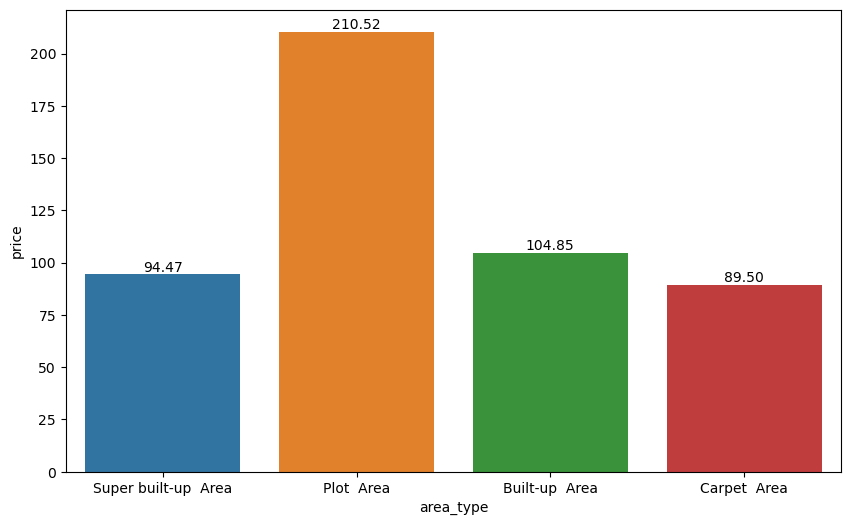

In [176]:
plt.figure(figsize=(10,6),dpi=100)
ax=sns.barplot(x='area_type',y='price',data=dt,ci=False)
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')
    
plt.show()

# Relationship between price and total squareft

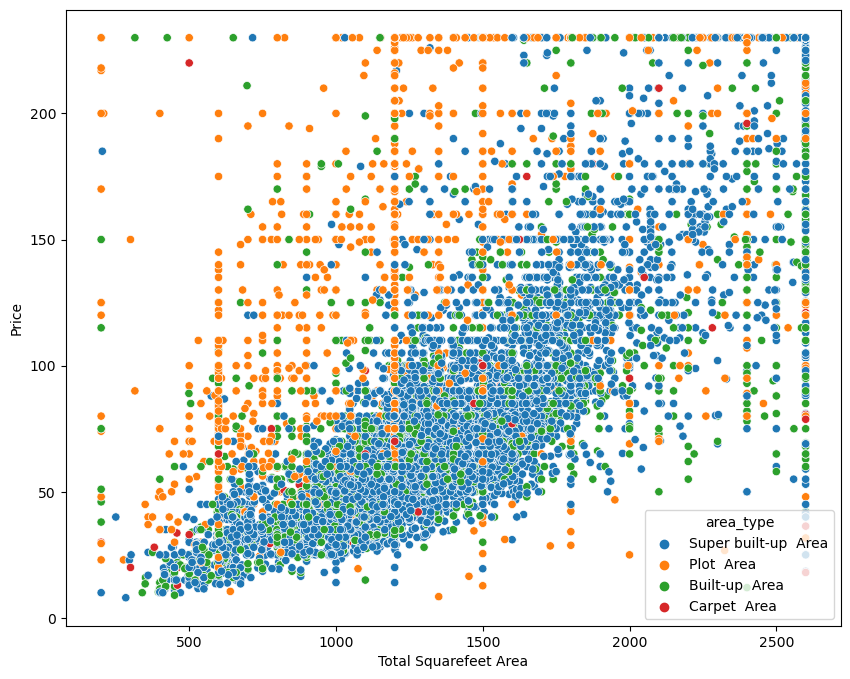

In [182]:
plt.figure(figsize=(10,8),dpi=100)
sns.scatterplot(x='Total',y='New_Price',hue='area_type',data=dt)
plt.xlabel('Total Squarefeet Area')
plt.ylabel('Price')

plt.show()

# Observations according to the area type

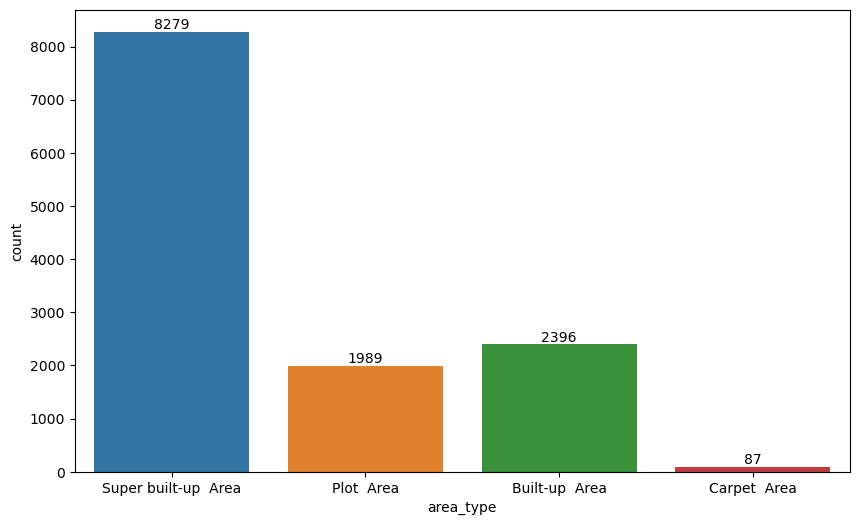

In [187]:
plt.figure(figsize=(10,6),dpi=100)
ax=sns.countplot(x='area_type',data=dt)

for i in ax.containers:
    ax.bar_label(i)

# Ratio of the areatype

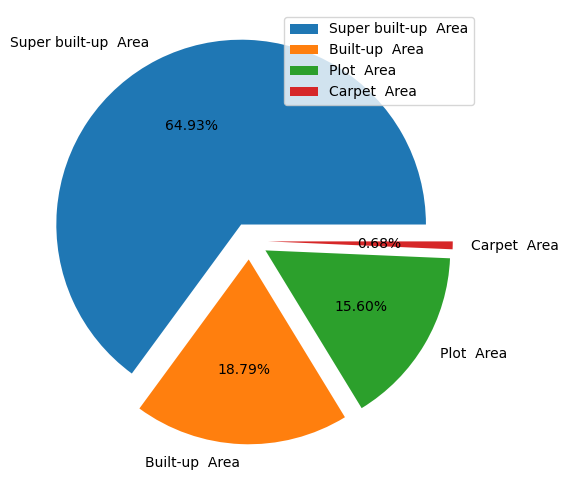

In [197]:
plt.figure(figsize=(10,6),dpi=100)
plt.pie(dt.area_type.value_counts(),labels=dt.area_type.value_counts().index,autopct='%.2f%%',explode=(0.1,0.1,0.1,0.1))
plt.legend()
plt.show()

In [198]:
dt.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total,New_Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0,51.00


# Average price of 2bhk, 3bhk and 4bhk

In [205]:
x=dt[(dt['size']=='2 BHK') | (dt['size']=='3 BHK') | (dt['size']=='4 BHK')]
x

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total,New_Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,1170.0,38.00
...,...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,1262.0,2.0,2.0,47.00,1262.0,47.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,1715.0,112.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600.0,5.0,2.0,400.00,2600.0,230.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,1141.0,60.00


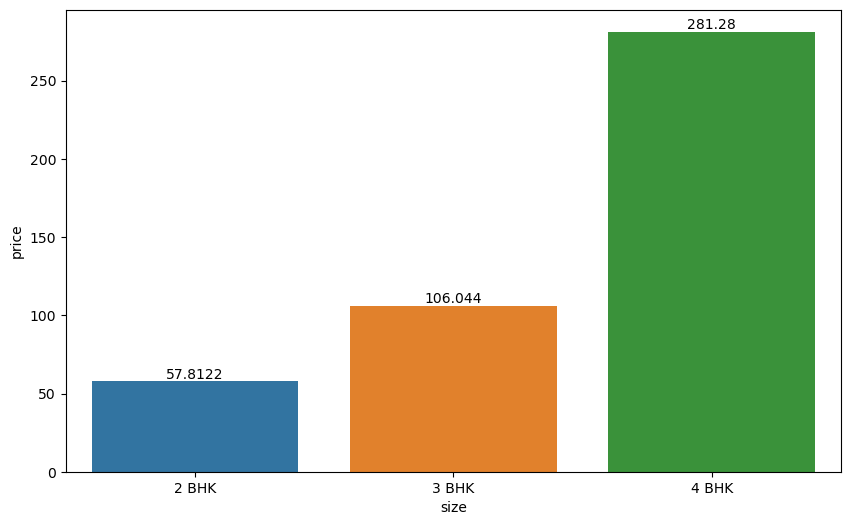

In [211]:
plt.figure(figsize=(10,6),dpi=100)
ax=sns.barplot(x='size',y='price',data=x,ci=False)
for i in  ax.containers:
    ax.bar_label(i)
plt.show()

# Maximum price of 2bhk, 3bhk and 4bhk

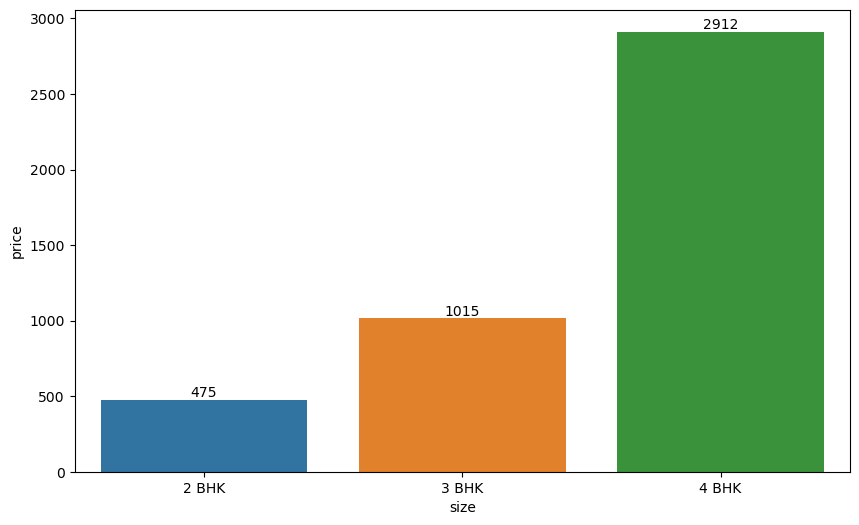

In [217]:
plt.figure(figsize=(10,6),dpi=100)
ax=sns.barplot(x='size',y='price',data=x,ci=False,estimator=np.max)
for i in  ax.containers:
    ax.bar_label(i)
plt.show()

# Maximum price of 2bhk, 3bhk and 4bhk

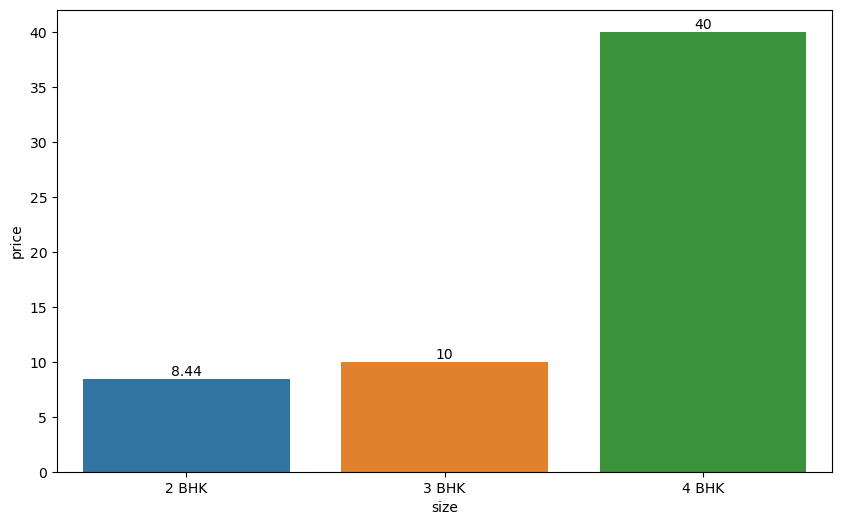

In [218]:
plt.figure(figsize=(10,6),dpi=100)
ax=sns.barplot(x='size',y='price',data=x,ci=False,estimator=np.min)
for i in  ax.containers:
    ax.bar_label(i)
plt.show()

# Coorelation

In [219]:
dt.corr()

,total_sqft,bath,balcony,price,Total,New_Price
total_sqft,1.000000,0.070651,0.024289,0.095442,0.199018,0.096206
bath,0.070651,1.000000,0.204597,0.450915,0.510562,0.610747
balcony,0.024289,0.204597,1.000000,0.123514,0.256576,0.182605
price,0.095442,0.450915,0.123514,1.000000,0.544568,0.688234
Total,0.199018,0.510562,0.256576,0.544568,1.000000,0.741639
New_Price,0.096206,0.610747,0.182605,0.688234,0.741639,1.000000


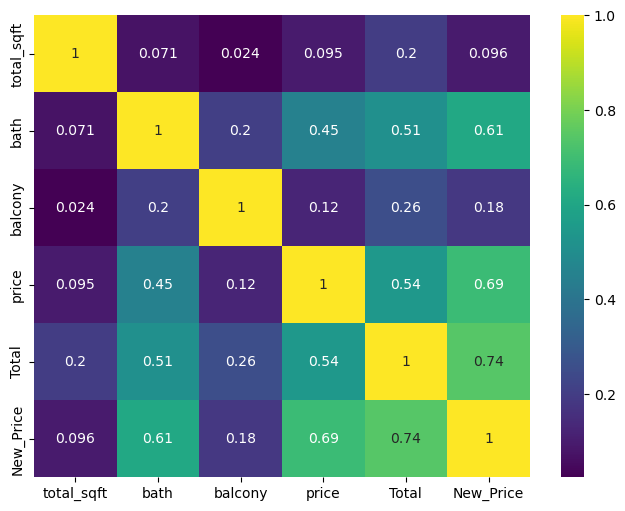

In [226]:
plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(dt.corr(),annot=True,cmap='viridis')
plt.show()